# Assignment 4: Computational Code and Output

In [1]:
library(tidyverse)
library(repr)
library(dplyr)
library(ggplot2)
library(GGally)
library(cowplot)
library(moderndive)
library(broom)
library(readr)
library(gridExtra)
library(car)
library(pROC)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    som

## Data Recap [Assignment 1]

In [2]:
url <- "https://raw.githubusercontent.com/Rz02/STAT_301_Group_38/main/Data/winequality-red.csv"
df <- read_csv(url)
red_wine <- separate(df, 
                     col = `fixed acidity;volatile acidity;citric acid;residual sugar;chlorides;free sulfur dioxide;total sulfur dioxide;density;pH;sulphates;alcohol;quality`,
                     into = c("fixed_acidity", "volatile_acidity", "citric_acid",
                              "residual_sugar", "chlorides","free_sulfur_dioxide",
                              "total_sulfur_dioxide","density","pH","sulphates",
                              "alcohol","quality"),
                     sep = ";") %>%
            mutate(across(.cols = 1:11, .fns = as.numeric),
            quality = as.integer(quality))

head(red_wine)

Rows: 1599 Columns: 1
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): fixed acidity;volatile acidity;citric acid;residual sugar;chlorides...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5


#### Relevant Information:
The dataset is related to red variant of the Portuguese "Vinho Verde" wine.

Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

#### Title: 
Wine Quality

#### Number of Instances:
1599

#### Number of Attributes:
11 input attributes + 1 output attribute

*Note: Several of the attributes may be correlated, thus it makes sense to apply some sort of feature selection.*

#### Attribute information:
*Input variables (based on physicochemical tests)* [**continuous**]:
- fixed acidity
- volatile acidity
- citric acid
- residual sugar
- chlorides
- free sulfur dioxide
- total sulfur dioxide
- density
- pH
- sulphates
- alcohol

*Output variable (based on sensory data)* [**integer**]: 
- quality (score between 0 and 10)
-> *Note: 0 (very bad), 10 (very excellent)*

*Missing Attribute Values*:
- None

#### Reference:
- GitHub raw CSV overview: https://raw.githubusercontent.com/Rz02/STAT_301_Group_38/main/Data/winequality-red.csv
- Source: https://archive.ics.uci.edu/dataset/186/wine+quality

## Question Recap [Assignment 1]

#### Can we judge the quality of red wine by using alcohol and volatile acidity?

## Main Visualization Recap [Assignment 2]

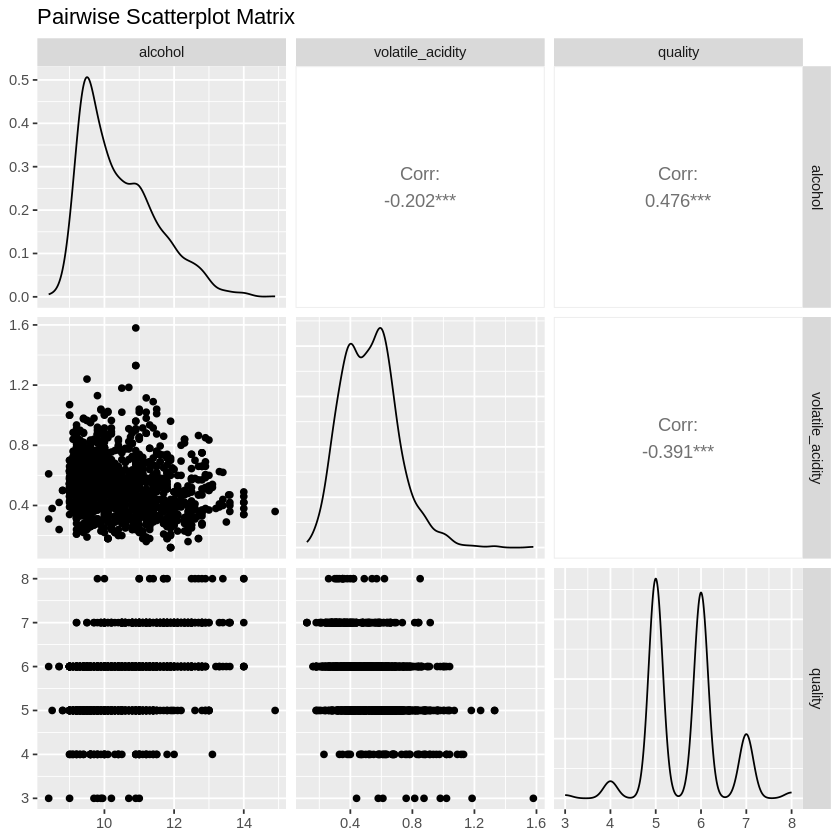

In [3]:
ggpairs(red_wine, columns = c("alcohol", "volatile_acidity", "quality"), title = "Pairwise Scatterplot Matrix")

## Initial Approach Recap [Assignment 2]

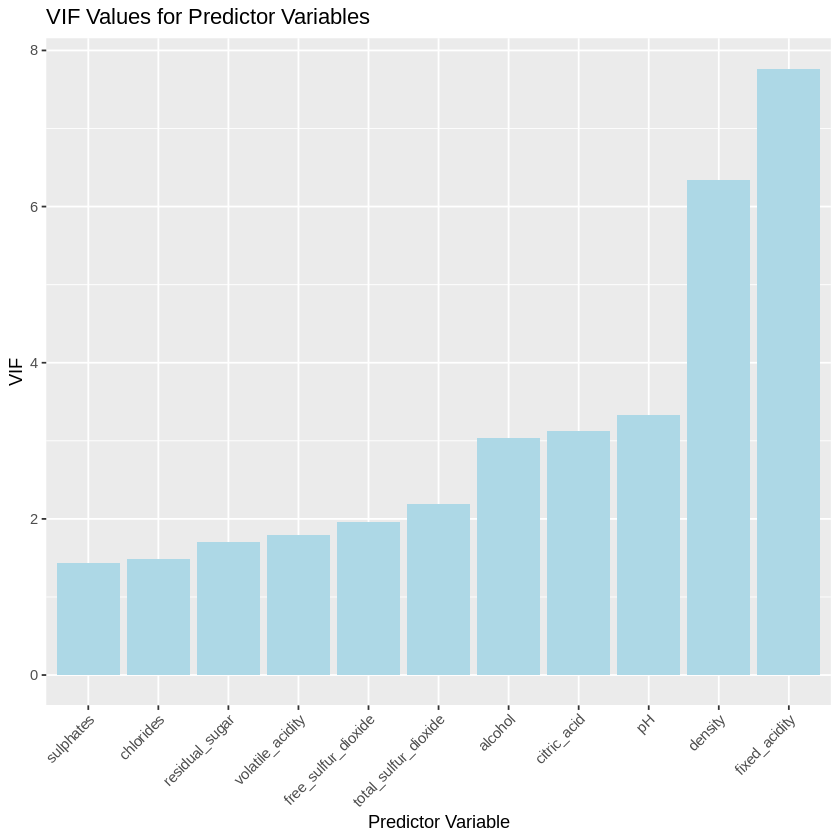

In [4]:
model <- lm(quality ~ ., data = red_wine)

vif_result <- vif(model)

vif_data <- data.frame(Predictor = names(vif_result), VIF = vif_result)

vif_plot <- ggplot(vif_data, aes(x = reorder(Predictor, VIF), y = VIF)) +
  geom_bar(stat = "identity", fill = "lightblue") +
  labs(title = "VIF Values for Predictor Variables",
       x = "Predictor Variable",
       y = "VIF") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) 

print(vif_plot)

## Appropriate Method Approach [Assignment 3]

Given that the response variable is **ordinal** (or categorical), and the fact that the relationship between each input variable and the response variable is **not linear**, a linear regression model might not be the best choice to answer the research question. Instead, one possible solution is to use **logistic regression**.

## Potential Limitations or Weakness [Assignment 3]

Since the distribution of quality is bell shaped with two obvious tails, it would be better if the model could be classified into 3 levels.

However, as we choose **logistic regression** for analysis, **binary** is the best we could approach temporarily. 

Better classification could be expected, but unable to realize at this stage.

## Implementation of a proposed model [Assignment 4]

- We will try to use a non-linear model such as **logistic regression** to compare the results.
- Given that logistic regression only takes a response variable that has two levels, but ours has 6 levels in this dataset, so transformation on quality is needed for further analysis. To align with the logistic regression framework, we want to transform the six-tiered variable into a **binary outcome**.

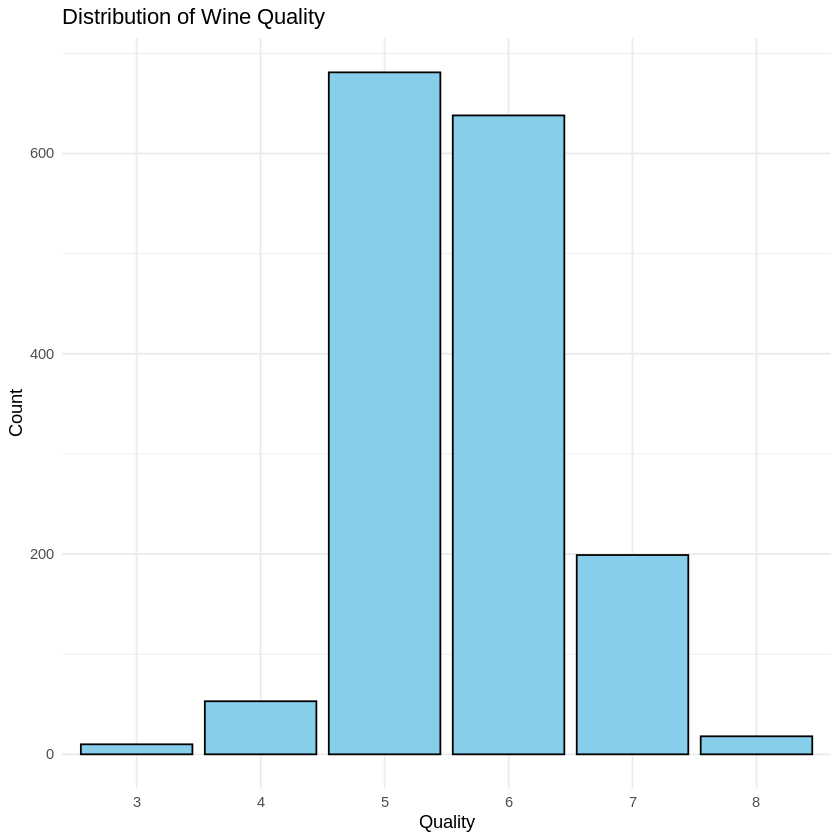

In [5]:
ggplot(red_wine, aes(x = factor(quality))) +
  geom_bar(fill = "skyblue", color = "black") +
  labs(title = "Distribution of Wine Quality",
       x = "Quality",
       y = "Count") +
  theme_minimal()

By observing the bar graph, one possible transformation is to divide the 6 levels of quality into **two levels**, "high" and "low" where **"high"** is quality **greater than 5** and **"low"** is quality **smaller or equal to 5**. This method allows for the use of logistic by focus on the probability of a wine being classified as high or low quality. Such an approach is common when the primary research interest is in distinguishing between higher and lower quality.

Meanwhile, We can observe that this dataset only contains red wines in quality range from 3 to 8. In other words, we do not expect to see information on red wines in quality range from 0 to 2 and from 9 to 10.

In [6]:
red_wine$quality_category <- ifelse(red_wine$quality > 5, "high", "low")

head(red_wine)

fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_category
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,low
7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5,low
7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5,low
11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6,high
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,low
7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5,low


In [7]:
red_wine$quality_category <- as.factor(red_wine$quality_category)

logistic_model <- glm(quality_category ~ alcohol + volatile_acidity, 
                      data = red_wine, 
                      family = "binomial")

summary(logistic_model)


Call:
glm(formula = quality_category ~ alcohol + volatile_acidity, 
    family = "binomial", data = red_wine)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4082  -0.9131  -0.3192   0.9103   3.2728  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)       8.34395    0.72630  11.488   <2e-16 ***
alcohol          -1.00468    0.06884 -14.594   <2e-16 ***
volatile_acidity  3.54124    0.35470   9.984   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2209.0  on 1598  degrees of freedom
Residual deviance: 1752.5  on 1596  degrees of freedom
AIC: 1758.5

Number of Fisher Scoring iterations: 4


The logistic regression results indicate that **both alcohol and volatile_acidity are statistically significant predictors of the quality_category**.

The p-values associated with the coefficients for both predictors are **highly significant (p < 0.001)**, suggesting that these variables are likely to be important in predicting the probability of a red wine being of "high" or "low" quality.

#### Testing Model

Since this is a binary classification model, by using knowledge from applied machine learning, **AUC-ROC** might be a good choice to double check the reliability.

Setting levels: control = high, case = low

Setting direction: controls < cases



[1] "AUC-ROC: 0.7955"


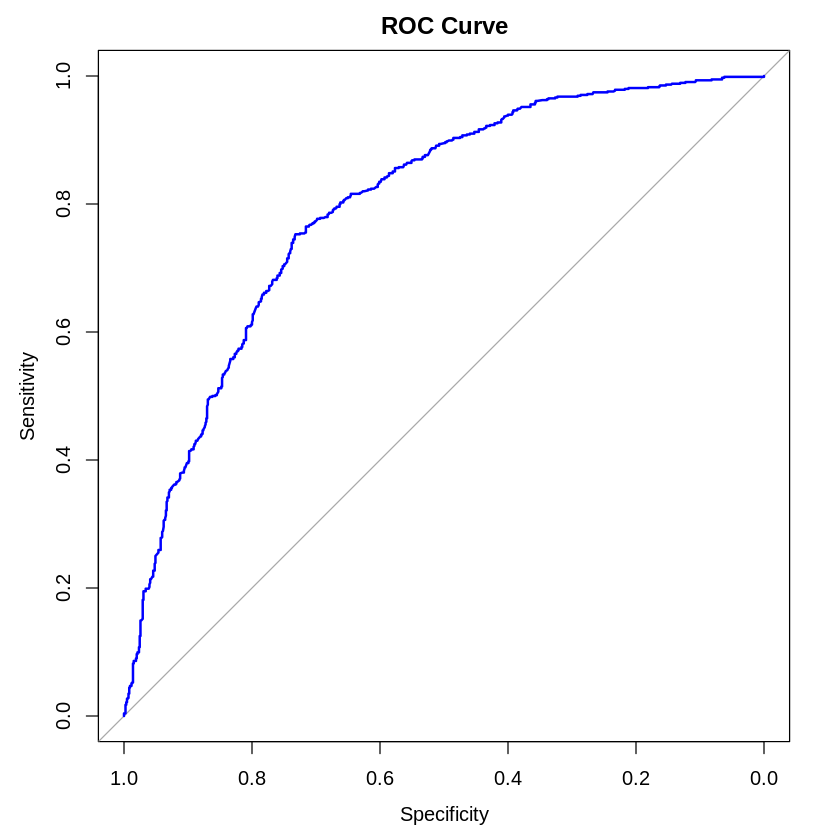

In [8]:
roc_curve <- roc(red_wine$quality_category, predict(logistic_model, type = "response"))

plot(roc_curve, main = "ROC Curve", col = "blue", lwd = 2)

auc_score <- auc(roc_curve)
print(paste("AUC-ROC:", round(auc_score, 4)))

An AUC-ROC of 0.7955 indicates that the logistic regression model has reasonably good discriminative power. The AUC-ROC value ranges from 0 to 1, with 1 representing perfect discrimination, and 0.5 representing a model that performs no better than random chance.

In this case, a value of 0.7955 suggests that the model is **performing well** in distinguishing between the two classes (high and low quality) based on the predicted probabilities.